# sktime - A Unified Framework for Machine Learning with Time Series

Tutorial at PyData Berlin 2022

sktime: https://github.com/alan-turing-institute/sktime

these tutorial notebooks: https://github.com/sktime/sktime-tutorial-pydata-berlin-2022

---

### What is sktime?

* scikit-learn like toolbox for learning with time series -> explained below
* open source, permissive license, python package
* openly governed, approx equal academia/industry/early career split
    * 18 core developers
    * community council
* numfocus-affiliated, affiliated academic centers in UK (and expanding)

**EVERYONE CAN [JOIN](https://www.sktime.org/en/stable/get_involved/contributing.html)! EVERYONE CAN BECOME A COMMUNITY LEADER!**

* join our slack (developers) and discord (events)!
    * regular **community collaboration sessions** and stand-ups on Fridays
    * next **community onboarding event**: May 25 - 27
    * next **developer sprint**: June 27 - July 1

Opportunities:
* UKRI grant at UEA, **maintainer job** soon to be advertised
* sktime **mentoring programme**: github.com/sktime/mentoring
* sktime is **Google Summer of Code 2022** org! Application deadline Apr 19


---
## Prelude: scikit-learn, the first scikit-learn-like toolbox

### what makes a scikit-learn-like toolbox?

* unified APIs and workflows ("strategy pattern")
* composability, modular model building
* openness - extensible, contributable

Also see scikit-learn's [getting started guide](https://scikit-learn.org/stable/getting_started.html)!

### Unified API

1. Data specification
2. Model specification
3. Fitting
4. Prediction
5. Evaluation

In [1]:
# 1. data specification
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split

X, y = load_diabetes(return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(X, y)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(331, 10) (111, 10) (331,) (111,)


In [2]:
# 2. model specification
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

regressor = RandomForestRegressor(n_estimators=99)

In [3]:
# 3. model fitting
regressor.fit(X_train, y_train)

RandomForestRegressor(n_estimators=99)

In [4]:
# 4. prediction
y_pred = regressor.predict(X_test)

In [5]:
# 5. evaluation and/or diagnostics
mean_squared_error(y_test, y_pred)

3405.0955721561777

`regressor` could have been any regression model, e.g., `LinearRegression`\
nothing else changes! -> unified interface

### Modular model building
* Pipelining & transformers
* Tuning
* Ensembling

In [6]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [7]:
pipeline = make_pipeline(StandardScaler(), KNeighborsRegressor())
pipeline

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsregressor', KNeighborsRegressor())])

In [8]:
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
mean_squared_error(y_test, y_pred)

4175.484684684685

### Summary

* cross-sectional input data, without any assumed temporal dependency or ordering
* three learning tasks: cross-sectional classification, regression and clustering 
* a common estimator API for each learning task 
* estimator APIs mirror learning tasks

In [10]:
!pip install sktime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 6.8 MB 3.1 MB/s 
     |████████████████████████████████| 9.8 MB 42.2 MB/s 
     |████████████████████████████████| 3.3 MB 36.1 MB/s 
     |████████████████████████████████| 34.5 MB 12 kB/s 
  Attempting uninstall: llvmlite
    Found existing installation: llvmlite 0.34.0
    Uninstalling llvmlite-0.34.0:
      Successfully uninstalled llvmlite-0.34.0
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2
  Attempting uninstall: numba
    Found existing installation: numba 0.51.2
    Uninstalling numba-0.51.2:
      Successfully uninstalled numba-0.51.2


---
## Introduction to Machine Learning with Time Series


Check out our previous tutorial from PyData Berlin 2021: https://github.com/sktime/sktime-tutorial-pydata-berlin-2021

### Multiple data formats

In [12]:
from sktime.datasets import load_lynx
from sktime.utils.plotting import plot_series

#### Univariate data
> Repeated observations over time from a single variable or kind of measurement

(<Figure size 1152x288 with 1 Axes>,
 <AxesSubplot:ylabel='Number of Lynx trappings'>)

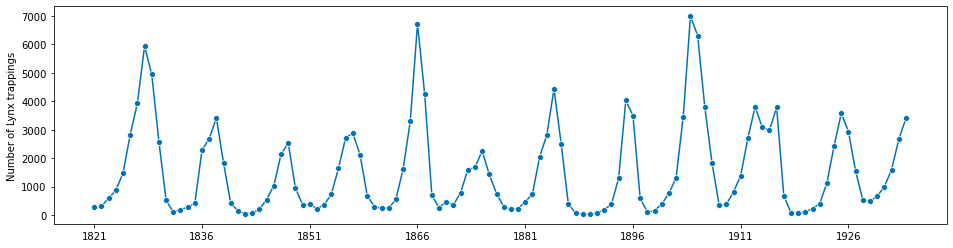

In [ ]:
y = load_lynx()
plot_series(y)

#### Multivariate data
> Repeated observations over time from multiple related variables or kinds of measurement

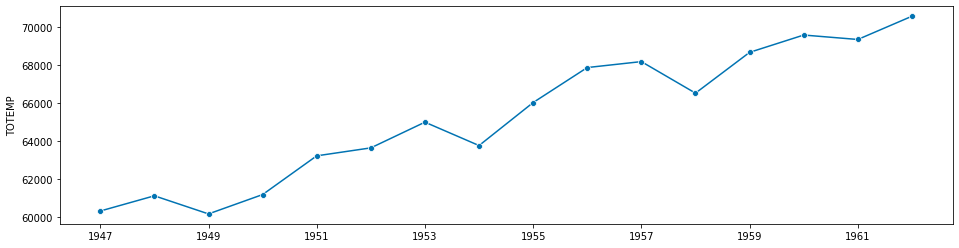

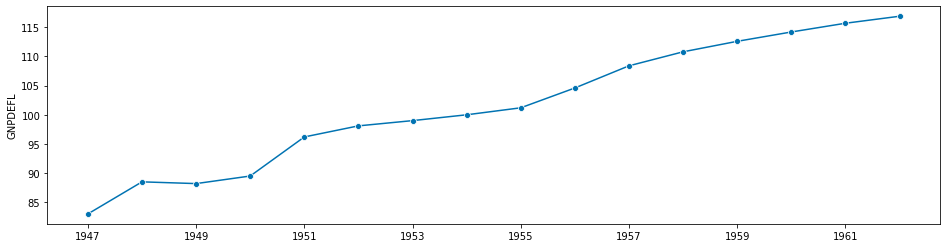

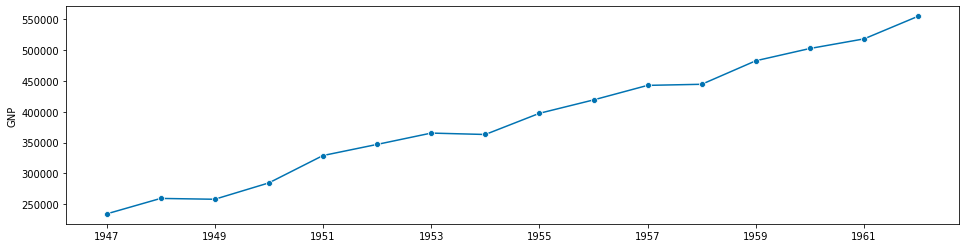

In [13]:
from sktime.datasets import load_longley

y, X = load_longley()

plot_series(y)
for column in X.columns[:2]:
    x = X[column]
    plot_series(x)

#### Panel data
> Repeated observations over time on multiple independent experimental units from one or more related variables or kinds of measurement

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sktime.datasets import load_arrow_head
from sktime.datatypes import convert

In [15]:
X, y = load_arrow_head(return_X_y=True)
X = convert(X, from_type="nested_univ", to_type="numpy3D")

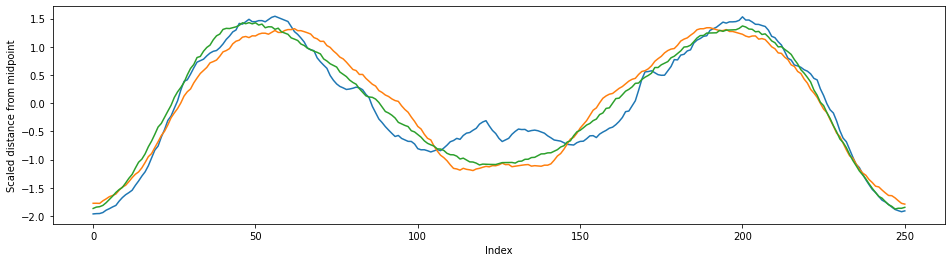

In [16]:
labels, counts = np.unique(y, return_counts=True)
fig, ax = plt.subplots(1, figsize=plt.figaspect(0.25))
for label in labels:
    ax.plot(X[y == label, 0, :][0], label=f"class {label}")
ax.set(ylabel="Scaled distance from midpoint", xlabel="Index");

### Multiple learning tasks

For example:
* Forecasting, variations:
    * (vanilla) forecasting
    * **panel forecasting**
    * **global/hierarchical forecasting**
    * univariate vs multivariate
    * with or without exogeneous variables
    * **point forecasts vs probabilistic forecasts**
* Time Series Classification
* Time Series Annotation (e.g. outlier detection)
* Time Series Clustering